# Mod1 Final Project Submission

Please fill out:
* Student name: Francis Agbodji
* Student pace: full time
* Scheduled project review date/time: (05/08/19 presentation)
* Instructor name: 
* Blog post URL:


In [ ]:
# Your code here - remember to use markdown cells for comments as well!

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import plotly.plotly as py
import seaborn as sns

In [ ]:
# load data
df = pd.read_csv('kc_house_data.csv')
#df.head()
df.tail()

In [29]:
# inspect data
df.info()
#df.shape
#df.describe()
#df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


## The Prediction Target

By quickly inspecting the data, we can see that the 'price' column is the prediction target, and all other columns are the variables available for prediction

> Let's further explore the price column and visualize it's distribution

In [49]:
# get stats on Price colummn
print(df['price'].describe())

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


> On average, our homes sell for USD 540,296.60
* The highest-selling house went for USD 7.7M
* The lowerst-selling house went for UDS 78,000

    - let's see how square footage of living space and sales price relate for homes in a give zipcode

In [39]:
df[['price', 'sqft_living','zipcode']].loc[df["zipcode"]== 98178]

,price,sqft_living,zipcode
0,221900.0,1180,98178
117,205425.0,880,98178
126,445000.0,2100,98178
273,236000.0,1300,98178
281,170000.0,860,98178
339,245000.0,1740,98178
345,165000.0,1000,98178
346,239900.0,1000,98178
414,339000.0,2390,98178
470,290900.0,1610,98178


> We can see that there seems to be a correlation between sale price and square footage of living space for houses in a given zipcode
    - Now let's visualize the distribution of Sale Price over the entire dataset

/Users/Frankie/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



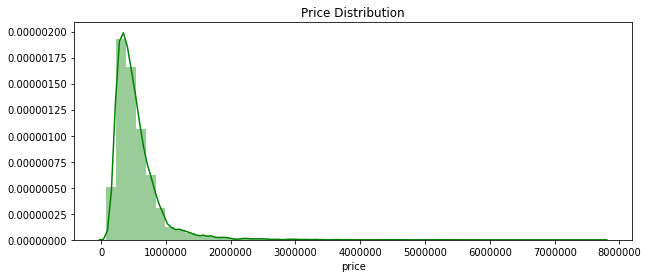

In [55]:
plt.figure(figsize=(10, 4))
plt.title('Price Distribution')
sns.distplot(df['price'], color='g', bins=50, hist_kws={'alpha': 0.4});
# warnings.simplefilter(action='ignore', category=FutureWarning)

> We can see that the majority of our houses are sold within the 0-1M range

> most of which sold between right under 200K and 700K

> with some outliers in the 1M-2M range

> and extreme outliers between 2M-7.7M

> We will now do some quick Exploratary Data Analysis on variable columns

In [ ]:
# check for blank values by columns

In [16]:
# change date column to Pandas date format & reformat it to dd/mm/yyyy
df.date = pd.to_datetime(df.date)
df.date = df.date.dt.strftime('%m-%d-%Y')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10-13-2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,09-12-2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,02-25-2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,09-12-2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,02-18-2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
